# Import

In [1]:
#####################################################
# referenced codes: 
######################################################

%load_ext autoreload
%autoreload 2
%matplotlib inline


import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import pickle
from tqdm import tqdm as tqdm

In [2]:
from stl10_input import DATA_PATH_TRAIN, LABEL_PATH_TRAIN, DATA_PATH_TEST, LABEL_PATH_TEST

from preprocess import RELEVANT_CLASSES, IMAGE_SHAPE, N_CLASSES, classes, preprocess, import_images
from store import load, save

from sift import sift_keypoints, get_patch_centers, sift_dense, sift_plot

from kmeans import select_subsets, kmeans_model, calc_class_features, predict_class_features, plot_class_features


sys.version_info(major=3, minor=6, micro=15, releaselevel='final', serial=0)


# Preprocess

In [3]:
images_train_ordered, labels_train_ordered, images_test, labels_test = preprocess(50, 100)

# Keypoints

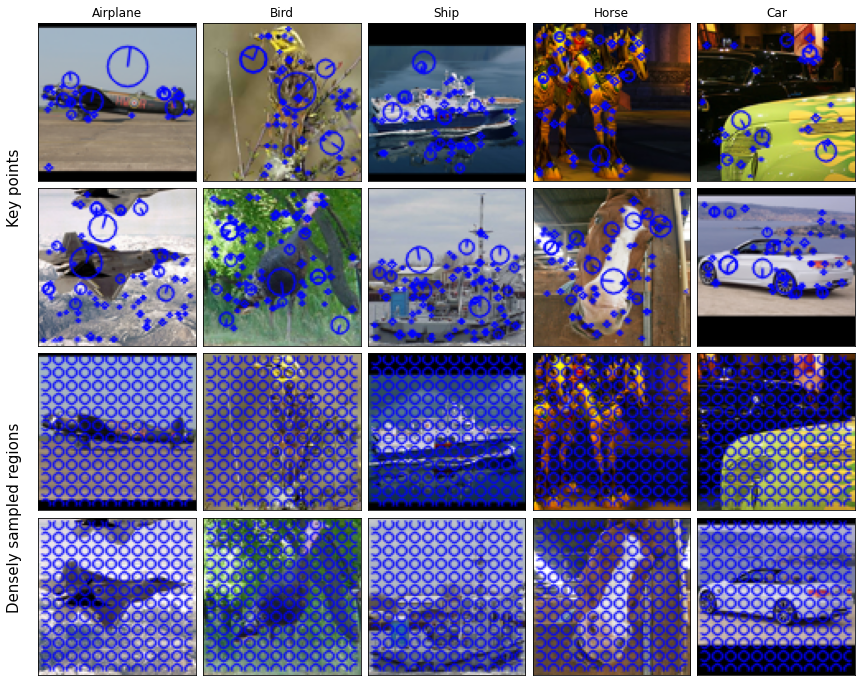

In [4]:
images_selected = np.swapaxes(images_train_ordered[:,:2], 0, 1).reshape(10, *IMAGE_SHAPE)
img_kps = np.array([sift_keypoints(img) for img in images_selected]).reshape(-1, *IMAGE_SHAPE)
img_dens = np.array([sift_dense(img) for img in images_selected]).reshape(-1, *IMAGE_SHAPE)

fig = sift_plot(img_kps, img_dens)
plt.show()

# Building Visual Vocabularies and Class dictionaries

In [5]:
vocab_sizes = np.array([500, 1000, 1500, 2000])
percentages = np.array([30, 40, 50, 60])

vocab_size = vocab_sizes[1]


### Calculate and save

In [6]:
## Comment this whole cell if you do not want to recalcualte everything ### 

for percentage1 in percentages:
    percentage2 = 100 - percentage1
    
    # Select subsets
    _, _, images_train_subset2, _ = select_subsets(images_train_ordered, labels_train_ordered, percentage1, percentage2)

    # Calculate features for subsets
    features2_list = [calc_class_features(imgs) for k, imgs in enumerate(images_train_subset2)]
    
    model = load(f'kmeans_model_{vocab_size}', percentage1, percentage2)
    
    preds = predict_class_features(features2_list, model)
    save(preds, 'class_features', percentage1, percentage2)
    

Predicting features from kmeans model: 100%|█████████████████████████████████████████████| 5/5 [00:05<00:00,  1.19s/it]


### Load and plot

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:14<00:00,  3.54s/it]


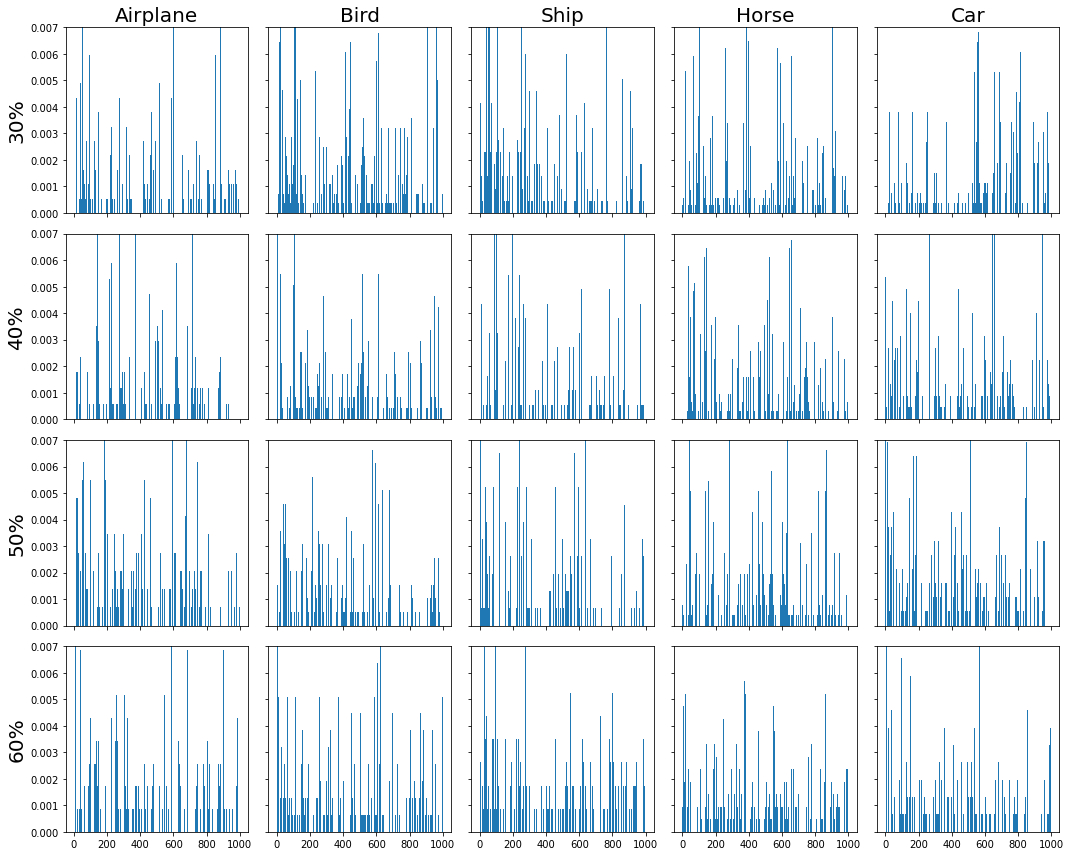

In [7]:
fig = plot_class_features(percentages, vocab_size)
plt.show()

In [8]:
assert 1 == 2

AssertionError: 

## SVM classification

In [ ]:
from svm import predict_labels

In [ ]:
# for percentage1 in percentages:
for percentage1 in percentages:
    print(f"{' ' + str(percentage1) + '% ':#^80}")
    percentage2 = 100 - percentage1
    
    # Get dictionarys subset
    _, _, images_train_subset2, labels_train_subset2 = select_subsets(images_train_ordered, labels_train_ordered, percentage1, percentage2)
    images_train_subset2 = images_train_subset2.reshape(-1, *IMAGE_SHAPE)
    labels_train_subset2 = labels_train_subset2.reshape(-1)
    
    model = load(f'kmeans_model_{vocab_size}', percentage1, percentage2)
    
    predict_labels(
        percentage1, percentage2, vocab_size,
        model,
        images_train_subset2, labels_train_subset2,
        images_test, labels_test
    )

# mAP and plots

In [ ]:
import collections
# mAP_dict = collections.defaultdict(makehash)
mAP_dict = myhash = collections.defaultdict(lambda : collections.defaultdict(dict))

In [ ]:
for percentage1 in percentages:
    print(f"{' ' + str(percentage1) + '% ':#^80}")
    percentage2 = 100 - percentage1
    
    preds_test_all_filename = f'preds_test_all_{vocab_size}'
    preds_test_all  = load(preds_test_all_filename, percentage1, percentage2)
    preds_test_ranked, preds_test_ranked_binary, preds_test_indices, labels_test_ranked, labels_test_ranked_binary = preds_test_all
    mAP_test  = calculate_mAP(preds_test_ranked_binary, labels_test_ranked_binary)
    
    mAP_dict['sift'][percentage1][vocab_size] = mAP_test

In [ ]:
from plot import plot_confusion_matrix, plot_pred_distribution, plot_and_save_dots, plot_top_images
from mAP import calculate_mAP

for percentage1 in percentages:
    print(f"{' ' + str(percentage1) + '% ':#^80}")
    percentage2 = 100 - percentage1

    preds_train_all_filename = f'preds_train_all_{vocab_size}'
    preds_test_all_filename = f'preds_test_all_{vocab_size}'

    preds_train_all = load(preds_train_all_filename, percentage1, percentage2)
    preds_test_all  = load(preds_test_all_filename, percentage1, percentage2)
    
    preds_train_ranked, preds_train_ranked_binary, preds_train_indices, labels_train_ranked, labels_train_ranked_binary = preds_train_all
    preds_test_ranked, preds_test_ranked_binary, preds_test_indices, labels_test_ranked, labels_test_ranked_binary = preds_test_all

    mAP_train = calculate_mAP(preds_train_ranked_binary, labels_train_ranked_binary)
    mAP_test  = calculate_mAP(preds_test_ranked_binary, labels_test_ranked_binary)
    print(f'mAP_train {mAP_train:.5f}\tmAP_test {mAP_test:.5f}')
    
    
    # Plot confusion matrix and prediciton distribution
    train_plots = [plot_confusion_matrix(preds_train_ranked_binary, labels_train_ranked_binary),
                   plot_pred_distribution(preds_train_ranked, labels_train_ranked_binary)]
    test_plots  = [plot_confusion_matrix(preds_test_ranked_binary, labels_test_ranked_binary),
                   plot_pred_distribution(preds_test_ranked, labels_test_ranked_binary)]
    
    for fig in train_plots:
        plt.show()
        
    for fig in test_plots:
        plt.show()

In [ ]:
mAP_dict

In [ ]:
assert 1 == 2

In [ ]:
# LOAD = False

# for percentage1 in percentages:
#     print(f'######## {percentage1}% ##########')
#     percentage2 = 100 - percentage1
    
#     # Get dictionarys subset
#     _, _, images_train_subset2, labels_train_subset2 = select_subsets(images_train_ordered, labels_train_ordered, percentage1, percentage2)
#     images_train_subset2 = images_train_subset2.reshape(-1, *IMAGE_SHAPE)
#     labels_train_subset2 = labels_train_subset2.reshape(-1)

#     # Getting fitted classifiers
#     model = load(f'kmeans_model_{vocab_size}', percentage1, percentage2)
    
#     hist_test_filename = f'hists_test_{vocab_size}'
#     hist_train_filename = f'hists_train_{vocab_size}'
#     classifers_filename = f'classifiers_{vocab_size}'
#     preds_train_all_filename = f'preds_train_all_{vocab_size}'
#     preds_test_all_filename = f'preds_test_all_{vocab_size}'
    
# #     if not LOAD:
#     hists_train = np.array([calc_hist(img, model, bins) for img in tqdm(images_train_subset2, desc = 'Calculating train hists')])
#     hists_test = np.array([calc_hist(img, model, bins) for img in tqdm(images_test, desc = 'Calculating test hists')])
#     classifiers = get_classifiers(hists_train, labels_train_subset2)

#     save(hists_test, hist_test_filename, percentage1, percentage2)
#     save(hists_train, hist_train_filename, percentage1, percentage2)
#     save(classifiers, classifiers_filename, percentage1, percentage2)
    
# #     else:
# #         hists_test  = load(hist_test_filename, percentage1, percentage2)
# #         hists_train = load(hist_train_filename, percentage1, percentage2)
# #         classifiers = load(classifiers_filename, percentage1, percentage2)
    
    
#     # Predictions of labels
#     preds_train = np.array([classifier.decision_function(hists_train) for classifier in tqdm(classifiers, desc = 'Classifying train set')])
#     preds_test = np.array([classifier.decision_function(hists_test) for classifier in tqdm(classifiers, desc = 'Classifying test set')])

#     # Get ranked predictions
#     preds_train_all = rank(preds_train, labels_train_subset2)
#     preds_test_all = rank(preds_test, labels_test)
    
#     save(preds_train_all, 'preds_train_all', percentage1, percentage2)
#     save(preds_test_all, 'preds_test_all', percentage1, percentage2)

# mAP

In [ ]:
# for percentage1 in percentages:
#     print(f'######## {percentage1}% ##########')
#     percentage2 = 100 - percentage1
    
#     preds_train_all = load('preds_train_all', percentage1, percentage2)
#     preds_test_all  = load('preds_test_all', percentage1, percentage2)
    
#     preds_train_ranked, preds_train_ranked_binary, preds_train_indices, labels_train_ranked, labels_train_ranked_binary = preds_train_all
#     preds_test_ranked, preds_test_ranked_binary, preds_test_indices, labels_test_ranked, labels_test_ranked_binary = preds_test_all

#     mAP_train = calculate_mAP(predictions_train_ranked_binary, predictions_train_ranked, labels_train_ranked_binary)
#     mAP_test  = calculate_mAP(predictions_test_ranked_binary, predictions_test_ranked, labels_test_ranked_binary)
#     print(f'mAP_train {mAP_train:.2f}\tmAP_test {mAP_test:.2f}')
    
    
#     # Plot confusion matrix and prediciton distribution
#     train_plots = [plot_confusion_matrix(preds_train_ranked_binary, labels_train_ranked_binary),
#                    plot_prediction_distribution(preds_train_ranked, labels_train_ranked_binary)]
#     test_plots  = [plot_confusion_matrix(preds_test_ranked_binary, labels_test_ranked_binary),
#                    plot_prediction_distribution(preds_test_ranked, labels_test_ranked_binary)]
    
#     for fig in train_plots:
#         plt.show()
        
#     for fig in test_plots:
#         plt.show()
        
        


# Final Plotting

In [ ]:
plot_top_images(images_train_subset2, preds_train_indices)
plot_top_images(images_test, preds_test_indices)

In [ ]:
example_predictions = np.array([1,1,0,1,0,0,1,0])
example_labels = np.array([1,1,1,1,1,1,1,1])
example_solution = 1/4*(1/1 + 2/2 + 0/3 + 3/4 + 0/5 + 0/6 + 4/7 + 0/8)
assert( 1/4 * fc(example_predictions, example_labels) == example_solution )
example_solution

## **2.6 Evaluation**

To evaluate your system, you should take all the test images from all classes and rank them based on each binary classifier. In other words, you should classify each test image with each classifier and then sort them based on the classification score. As a result, you will have five lists of test images. Ideally, you would have images with airplanes on the top of your list which is created based on your airplane classifier, and images with cars on the top of your list which is created based on your car classifier, and so on.

In addition to the qualitative analysis, you should measure the performance of the system quantitatively with the Mean Average Precision over all classes. The Average Precision for a single class c is defines as
\begin{equation}
\frac{1}{m_c} \sum_{i=1}^{n} \frac{f_c(x_i)}{i}\mbox{ ,}
\end{equation}
where $n$ is the number of images ($n=50\times 5=250$), $m$ is the number of images of class $c$ ($m_c=50$), $x_i$ is the $i^{th}$ image in the ranked list $X = \left \{ x_1, x_2, \dots, x_n  \right \}$, and finally, $f_c$ is a function which returns the number of images of class $c$ in the first $i$ images if $x_i$ is of class $c$, and 0 otherwise. To illustrate, if we want to retrieve $R$ and we get the following sequence: $[R, R, T, R, T, T, R, T]$, then $n = 8$, $m = 4$, and $AP(R, R, T, R, T, T, R) = \frac{1}{4} \left (  \frac{1}{1} + \frac{2}{2} + \frac{0}{3} + \frac{3}{4} + \frac{0}{5} + \frac{0}{6} + \frac{4}{7} + \frac{0}{8} \right )$.

####  **` Q2.6: Evaluation and Discussion (30-pts)`**

Show the evaluation results and describe. For the qualitative evaluation, you are expected to visualize the top-5 and the bottom-5 ranked test images (based on the classifier confidence for the target class) per setup. The report should include the analysis of the results for different settings such as:
- mAP based on different subset ratios to create the vocabulary list (30%, 40%, 50% and 60%) under the fixed vocabulary size 1000.
- Based on the ratio among the above four settings that lead to the best performance, change the vocabulary sizes to different sizes (500, 1000, 1500, 2000). Report and discuss the mAP.
- Based on the above experiments, find the best setting. Report the mAP based on SIFT descriptor and HoG descriptor. 
- The impact of the hyper-parameters of SVM.  

**Hint 1:**
To alleviate the working load, the discussion on the impact of SVM’s hyper-parameter settings only need to based on the optimal settings from the first three questions.

**Hint 2:**
Be sure to discuss the differences between different settings such as vocabulary sizes in your report.

**Hint 3:**
You can use *skimage.feature.hog* to extract HoG descriptor. The relevant documents can be found at [link](https://scikit-image.org/docs/dev/api/skimage.feature.html?highlight=hog#skimage.feature.hog).

In [ ]:
################################
# Todo: finish the code
################################